In [1]:
pip install slycot

     |████████████████████████████████| 1.6MB 8.7MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for slycot: filename=slycot-0.4.0-cp37-cp37m-linux_x86_64.whl size=1417831 sha256=90104aae2c757d16aafac6c2951d72b243dad3e9b040ad8401af8240315e8300
  Stored in directory: /root/.cache/pip/wheels/a2/46/56/f82cbb2fd06556f4f3952a2eb2396e8fd29264fffecbaad3cf
Successfully built slycot


In [2]:
pip install control 

     |████████████████████████████████| 348kB 8.6MB/s 
  Created wheel for control: filename=control-0.9.0-py2.py3-none-any.whl size=344920 sha256=646e183ae5c6a6a8587b44e50d16ccd110eb1689c955f5c2be8121db6f68f833
  Stored in directory: /root/.cache/pip/wheels/35/be/ee/081b68ca3e4b2d253fba2f7f7e51960373903fb7b6d13c5532
Successfully built control


In [27]:
import numpy as np
from numpy.linalg import *
import control
import slycot
from control.matlab import *
import control.modelsimp as msimp
from scipy.linalg import fr actional_matrix_power
import matplotlib.pyplot as plt

In [66]:
sys = drss(100,1)


In [85]:
r = 15

In [86]:
c = ctrb(sys.A,sys.B) 

In [87]:
o = obsv(sys.A,sys.C)

In [88]:
Hen = o @ c

In [89]:
Hen.shape

(100, 100)

In [90]:
[u,s,vt] = np.linalg.svd(Hen)

In [91]:
vt = np.matrix(vt)

In [92]:
s = fractional_matrix_power(np.diag(s)[0:r,0:r], -0.5) 

Psi = c @ vt.H[:,0:r] @ s
Phe = o.H @ u[:,0:r] @ s

Ar = Phe.H @ sys.A @ Psi
Br = Phe.H @ sys.B
Cr = sys.C @ Psi 
Dr = 0

sysr = ss(Ar, Br, Cr, Dr) 

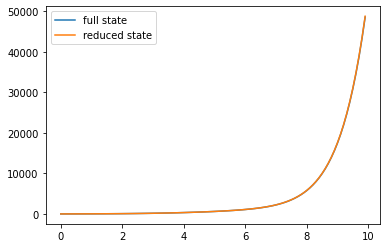

In [93]:
# Comparison of the impulse responses of the full and reduced random systems
t = np.arange(0,10,0.1)
y, t = impulse(sys,t)
yr, t = impulse(sysr,t)
plt.plot(t.T, y.T,label='full state')
plt.plot(t.T, yr.T,label='reduced state')
plt.legend()